

```
Name : Sudarsun S
RegNo : 20BCE1699
Machine Learning Embedded Lab
Topic : Decision Tree Classifier
```



## Importing Dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("drug200.csv")
display(df.head())

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
print(df.shape)

(200, 6)


In [ ]:
X = df.iloc[:,:5].values
Y = df.iloc[:,5].values

# Preprocessing

In [ ]:
from sklearn import preprocessing
le_sex  = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])


In [ ]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL','HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

In [ ]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion="entropy")

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of Decision Tree Classifier: {accuracy}")


Accuracy of Decision Tree Classifier: 1.0


# Confusion Matrix

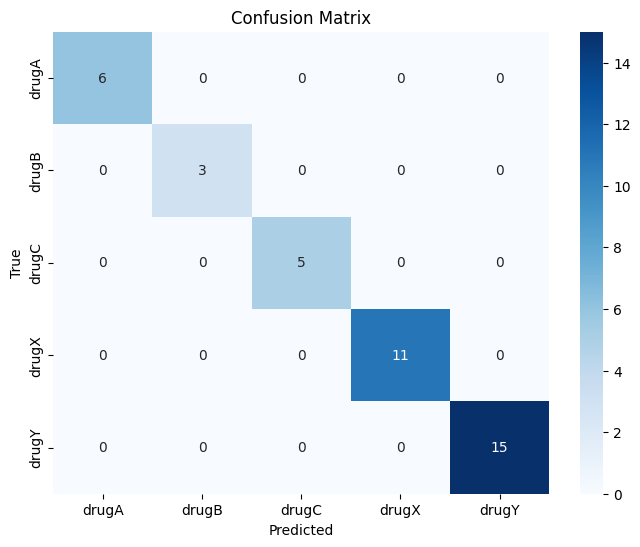

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Vissualization of Decision Tree

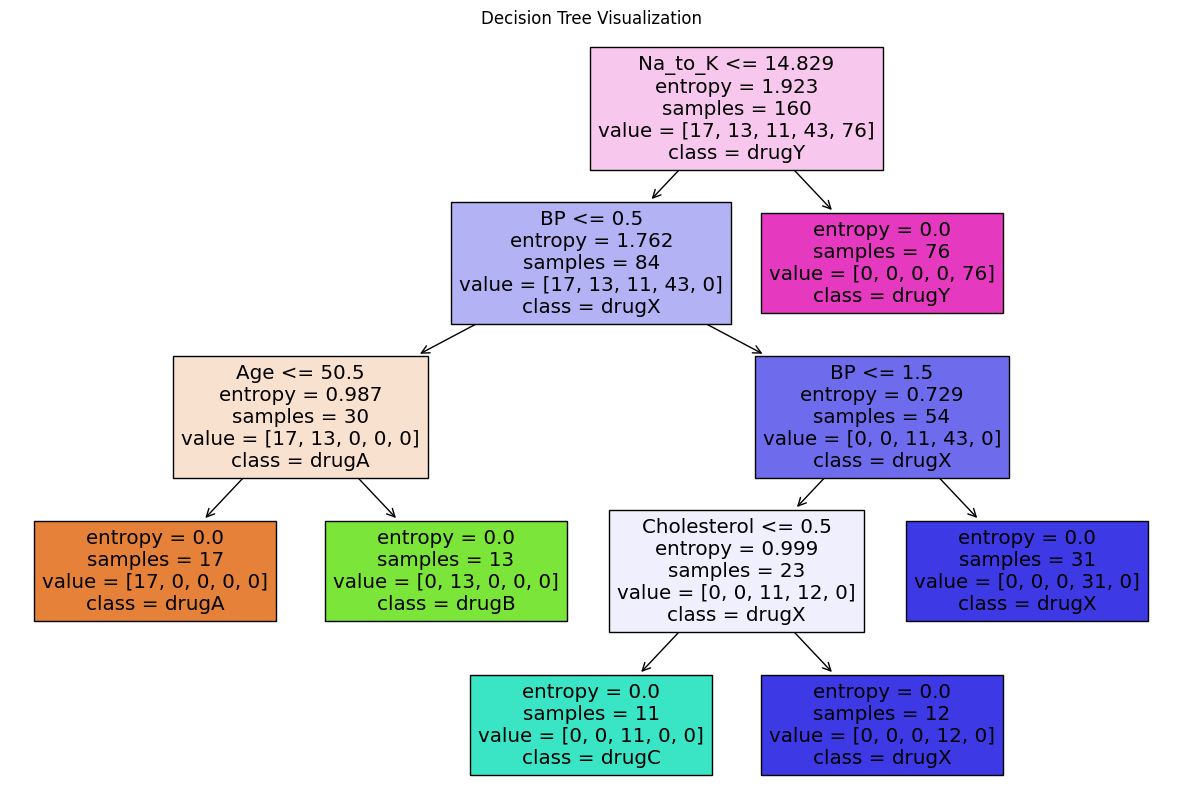

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X = df.drop("Drug", axis = 1)
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.title("Decision Tree Visualization")
plt.show()


## Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_clf = grid_search.best_estimator_

Y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of Best Decision Tree Classifier: {accuracy}")


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of Best Decision Tree Classifier: 1.0


# Convert decision tree into pdf using graphviz

In [ ]:
from sklearn.tree import  export_graphviz
import graphviz


dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=clf.classes_,
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'